In [1]:
# K-Means Clustering:

#Importing in Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Charts to Appear in notebook:
%matplotlib inline

In [2]:
# Import DataSet
dataset = pd.read_csv('cars (dataset for k means).csv')
dataset

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,Toyota
257,36.1,4,91,60,1800,16,1979,Nissan
258,22.0,6,232,112,2835,15,1983,Toyota
259,18.0,6,232,100,3288,16,1972,Toyota


In [3]:
# x = dataset.iloc[:, :-1].values
# x

In [4]:
# Converting Data Frame to Numeric Values:
x = dataset[dataset.columns[:-1]]
# x.convert_objects(convert_numeric=True)
x = x._convert(numeric=True)
x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [5]:
# Eliminating Null Values:
for i in x.columns:
    x[i] = x[i].fillna(int(x[i].mean()))

# To perform check if any null values are available:
for i in x.columns:
    print(x[i].isnull().sum())


0
0
0
0
0
0
0


c:\MKM_WORK\PYTHON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


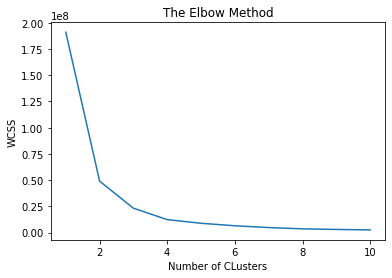

In [6]:
# Using Elbow Method to find the optimal number of clusters:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Applying k-means to the cars dataset:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
x = x.values
x

array([[1.400e+01, 8.000e+00, 3.500e+02, ..., 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, ..., 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, ..., 3.449e+03, 1.100e+01,
        1.971e+03],
       ...,
       [2.200e+01, 6.000e+00, 2.320e+02, ..., 2.835e+03, 1.500e+01,
        1.983e+03],
       [1.800e+01, 6.000e+00, 2.320e+02, ..., 3.288e+03, 1.600e+01,
        1.972e+03],
       [2.200e+01, 6.000e+00, 2.500e+02, ..., 3.353e+03, 1.500e+01,
        1.977e+03]])

<function matplotlib.pyplot.show(close=None, block=None)>

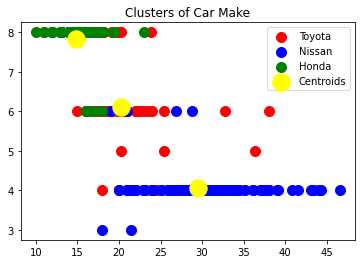

In [8]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Toyota')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Nissan')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Car Make')
plt.legend()
plt.show